# 一、資料匯入

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文 (for Win10)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊
df_ml = pd.read_csv('tw_house.csv', encoding='big5') #台北市
df_ml.sample(5) #隨機取其中5筆資料

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
169,士林區,7.99,40.34,240456,1,1,1,0.00,0,9,97,106,970.0,0,0,0,0,0,0,1,0,0,0,0,0
418,士林區,32.00,70.41,38347,3,1,2,0.00,0,46,60,106,270.0,0,0,0,0,0,0,1,0,0,0,0,0
593,北投區,9.29,140.75,247973,2,2,1,39.61,2800000,4,102,106,2788.0,0,0,0,0,1,0,0,0,0,0,0,0
349,大同區,28.86,191.77,194397,3,2,2,38.99,2300000,1,105,106,3200.0,0,0,0,0,0,0,0,1,0,0,0,0
33,內湖區,30.07,112.18,95204,3,2,2,0.00,0,32,74,105,1068.0,0,0,0,1,0,0,0,0,0,0,0,0


# 二、建模前預處理

## 切分訓練及測試資料

In [8]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
555,124.02
437,135.48
169,40.34
637,110.47
143,114.66


## 標準化

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

## 產生高次方項

In [10]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2) #0~2次方

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std) 
X_poly = quadratic.fit_transform(X_std)
print(X_train_poly[:5])

[[ 1.         -0.06842313  0.00468172]
 [ 1.          0.0408992   0.00167274]
 [ 1.         -0.86668603  0.75114467]
 [ 1.         -0.19768296  0.03907855]
 [ 1.         -0.15771257  0.02487326]]


# SVM Regressor

In [11]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_std, y_train.values.ravel()) #ravel()壓縮成一維矩陣

print("MSE: %.2f" % np.mean((svr.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",svr.score(X_test_std, y_test.values.ravel()))

MSE: 4839175.70
R Square: -0.014660148306090193


## 三種kernel比較(可tune C、degree)

MSE: 2951792.11
R Square: 0.3810793397619816
MSE: 1215406.83
R Square: 0.7451580698959165
MSE: 3559170.48
R Square: 0.25372652998090617


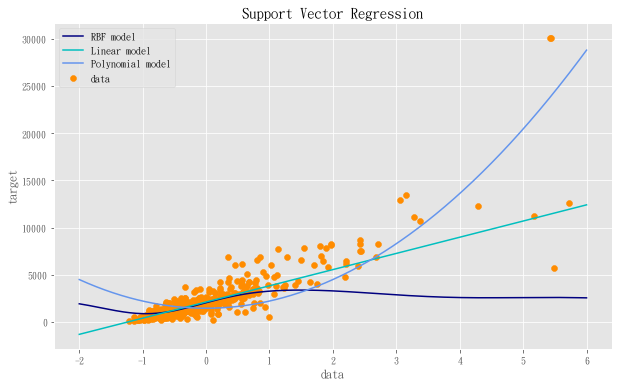

In [13]:
T = np.linspace(-2, 6, 600).reshape(-1,1) #reshape成二維矩陣

svr_rbf = SVR(kernel='rbf', C=30)
y_rbf = svr_rbf.fit(X_train_std, y_train.values.ravel()).predict(T)

print("MSE: %.2f" % np.mean((svr_rbf.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",svr_rbf.score(X_test_std, y_test.values.ravel()))

svr_lin = SVR(kernel='linear', C=30)
y_linear = svr_lin.fit(X_train_std, y_train.values.ravel()).predict(T)
print("MSE: %.2f" % np.mean((svr_lin.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",svr_lin.score(X_test_std, y_test.values.ravel()))

svr_poly = SVR(kernel='poly', C=30, degree=2)
y_poly = svr_poly.fit(X_train_std, y_train.values.ravel()).predict(T)
print("MSE: %.2f" % np.mean((svr_poly.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",svr_poly.score(X_test_std, y_test.values.ravel()))



plt.figure(figsize=(10,6))
plt.scatter(X_train_std, y_train['總價元'], color='darkorange', label='data')
plt.plot(T, y_rbf, color='navy', label='RBF model')
plt.plot(T, y_linear, color='c', label='Linear model')
plt.plot(T, y_poly, color='cornflowerblue', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()